# Converting GeoJSON labels to COCO-formatted labels using `Solaris`

Now, you can automatically generate COCO .jsons from GeoJSON vector labels and georegistered image files. Let's look at a couple of exmaples of how to do so. All of these cases use the [solaris.data.coco.geojson2coco()](../../api/data.rst#solaris.data.coco.geojson2coco) function. For more information about the COCO specification, see [the COCO dataset website](http://cocodataset.org/#format-data).

## Syntax
The [solaris.data.coco.geojson2coco()](../../api/data.rst#solaris.data.coco.geojson2coco) takes the following arguments:

- `image_src`: a `str` or `list` or `dict` defining source image(s) to use in the dataset. These are required not only to list as part of the dataset, but also to convert georegistered labels to pixel coordinates. This argument can be: 

        1. a string path to an image (e.g. `"path/to/a/geotiff.tif"`)
        2. the path to a directory containing a bunch of images (e.g. `"/path/to/geotiff/dir/"`)
        3. a list of image paths (e.g. `["path/to/geotiff_1.tif", "path/to/geotiff_2.tif"]`)
        4. a dictionary corresponding to COCO-formatted image records (e.g.
    ```
    [
        {
          "id": 1,
          "file_name": "path/to/geotiff.tif",
          "height": 640,
          "width": 640,
        },
        {etc.}
    ]
    ```
        5. a string path to a COCO JSON containing image records (e.g. `"path/to/coco_dataset.json"`)

    If `image_src` is a directory, the `recursive` flag will be used to determine whetheror not to descend into sub-directories.


- `label_src`: `str` or `list` of source labels to use in the dataset. This can be a string path to a geojson, the path to a directory containing multiple geojsons, or a list of geojson file paths. If a directory, the `recursive` flag will determine whether or not to descend into sub-directories.
- `output_path` : an optional `str` path to save the JSON-formatted COCO records to. If not provided, the records will only be returned as a dict, and not saved to file.
- `image_ext`: The string extension to use to identify images when searching directories. Only has an effect if `image_src` is a directory path. Defaults to `".tif"`.
- `matching_re` : A regular expression pattern to match filenames between `image_src` and `label_src` if both are directories of multiple files. This has no effect if those arguments do not both correspond to directories or lists of files. If this isn't provided, it is assumed that label filenames and image filenames differ _only in their extensions_, and filenames will be compared for identity to find matches.
- `category_attribute`: The `str` name of an attribute in the geojson that specifies which category a given instance corresponds to. If not provided, it's assumed that only one class of object is present in the dataset, which will be termed `"other"` in the output json.
- `preset_categories`: An optional pre-set `list` of `dict`s of categories to use for labels. These categories should
    be formatted per [the COCO category specification](http://cocodataset.org/#format-data).
- `include_other`: A boolean which, if set to `True`, and `preset_categories` is provided, causes objects that don't fall into the specified categories to be kept in the dataset. They will be passed into a category named `"other"` with its own associated category `id`. If `False`, objects whose categories don't match a category from `preset_categories` will be dropped.
- `info_dict`:  An optional `dict` with the following key-value pairs:

    - `"year"`: `int` year of creation
    - `"version"`: `str` version of the dataset
    - `"description"`: `str` string description of the dataset
    - `"contributor"`: `str` who contributed the dataset
    - `"url"`: `str` URL where the dataset can be found
    - `"date_created"`: `datetime.datetime` when the dataset was created

    If `info_dict` isn't provided, it will be left out of the .json created by `solaris`.

- license_dict:
    An optional `dict` containing the licensing information for the dataset, with
    the following key-value pairs:

    - `"name"`: `str` the name of the license.
    -  `"url"`: `str` a link to the dataset's license.

    __Note__: This implementation assumes that all of the data uses one license. If multiple licenses are provided, the image records will not be assigned a license ID.
- recursive: If `image_src` and/or `label_src` are directories, setting this flag to `True` will induce solaris to descend into subdirectories to find files. By default, solaris does not traverse the directory tree.
- verbose : Verbose text output. By default, none is provided; if `True` or `1`, information-level outputs are provided; if `2`, extremely verbose text is output.

## Examples

See the two examples below for usage of this function.

#### Example 1: A dataset with one image and one json (for example, untiled geospatial imagery files)

In this example, we'll load in a single image and geojson. Because there's only one file for each, labels will be converted to their pixel coordinates within the only image included. In addition, we'll specify a property of the items in the geojson, `"truncated"`, to separate into two classes. Note that we won't include any license information or info metadata since we're not providing that during dataset creation.

In [3]:
import solaris as sol
from solaris.data import data_dir
import os
import json

sample_geojson = os.path.join(data_dir, 'geotiff_labels.geojson')
sample_image = os.path.join(data_dir, 'sample_geotiff.tif')

coco_dict = sol.data.coco.geojson2coco(sample_image, sample_geojson,
                                       category_attribute='truncated')

  0%|          | 0/1 [00:00<?, ?it/s]/Users/nweir/code/cosmiq_repos/solaris/solaris/data/coco.py:218: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)
100%|██████████| 1/1 [00:00<00:00,  4.41it/s]


Let's see what that looks like!

In [5]:
from IPython.display import JSON
JSON(coco_dict)

<IPython.core.display.JSON object>

In case the above doesn't render for you, the raw text is below.

In [6]:
print(coco_dict)

{'annotations': [{'id': 1, 'image_id': 1, 'category_id': 1, 'segmentation': [0.0, 2.845103836618364, 7.787239895900711, 7.813573766499758, 6.348949391860515, 21.166115891188383, 5.487595358863473, 29.24418894201517, 19.3797596283257, 37.85056554712355, 18.118415302364156, 57.70217224024236, 0.0, 54.131107677705586, 0.0, 2.845103836618364], 'area': 608.3880075917921, 'bbox': [0.0, 2.845103836618364, 19.3797596283257, 54.857068403624], 'iscrowd': 0}, {'id': 2, 'image_id': 1, 'category_id': 2, 'segmentation': [27.38481539185159, 226.1645903000608, 34.46586190746166, 226.48033855389804, 34.72251786501147, 221.01391235832125, 44.8147500208579, 221.47823364380747, 44.453276831656694, 229.49973394535482, 56.44128756551072, 230.05102432798594, 54.999366192379966, 261.5376432267949, 46.934077847748995, 267.3053462980315, 25.54191842698492, 266.33953956048936, 27.38481539185159, 226.1645903000608], 'area': 1175.2086036457465, 'bbox': [25.54191842698492, 221.01391235832125, 30.8993691385258, 46.2

And, to show the image with the labels overlaid:

In [11]:
from matplotlib import pyplot as plt
from matplotlib import patches
import skimage

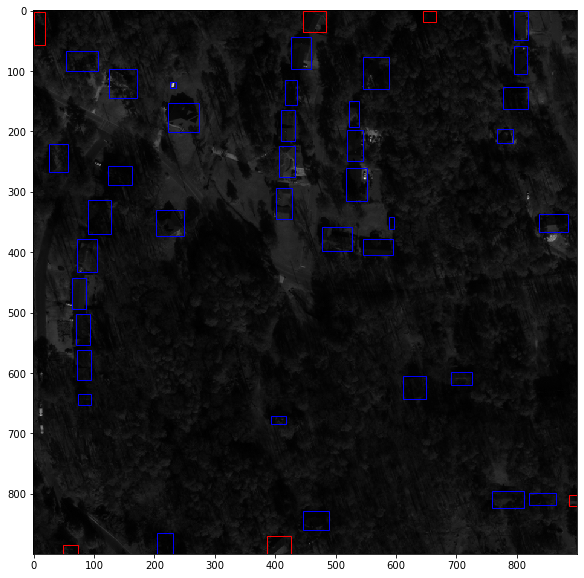

In [17]:
im = skimage.io.imread(sample_image)
f, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im, cmap='gray')
colors = ['', 'r', 'b']
for anno in coco_dict['annotations']:
    patch = patches.Rectangle((anno['bbox'][0], anno['bbox'][1]), anno['bbox'][2], anno['bbox'][3], linewidth=1, edgecolor=colors[anno['category_id']], facecolor='none')
    ax.add_patch(patch)

It's a little tough to see here, but building bounding boxes from the COCO dataset are boxed, with truncated buildings (at the edge of the image) in a different category.

#### Example 2: A dataset with multiple images and geojsons (for example, tiled SpaceNet datasets)

To use multiple images and geojsons, `solaris` needs a way to match them to one another. This can be done one of two ways:
1. If the images and their corresponding geojsons have the exact same filenames once extension and directory information are removed, then `solaris` can match them without any help.
2. You can provide a regex to extract substrings from image and geojson filenames that should be identical between matching files.

Since 2. is more complicated, we'll show an example of doing that here. We'll also include license information to show what that looks like.

In [20]:
sample_geojsons = [os.path.join(data_dir, 'vectortile_test_expected/geoms_733601_3724734.geojson'),
                   os.path.join(data_dir, 'vectortile_test_expected/geoms_733601_3724869.geojson')]
sample_images = [os.path.join(data_dir, 'rastertile_test_expected/sample_geotiff_733601_3724734.tif'),
                 os.path.join(data_dir, 'rastertile_test_expected/sample_geotiff_733601_3724869.tif')]

coco_dict = sol.data.coco.geojson2coco(sample_images,
                                       sample_geojsons,
                                       matching_re=r'(\d+_\d+)',
                                       license_dict={'CC-BY 4.0': 'https://creativecommons.org/licenses/by/4.0/'},
                                       verbose=0)

100%|██████████| 2/2 [00:00<00:00, 17.27it/s]


Once again, we'll display the json to show what the output looks like.

In [21]:
JSON(coco_dict)

<IPython.core.display.JSON object>

In [22]:
print(coco_dict)

{'annotations': [{'id': 1, 'image_id': 1, 'category_id': 1, 'segmentation': [60.03418597159907, 74.87320505268872, 73.8337494416628, 90.0, 51.516283753560856, 90.0, 47.80893106292933, 85.93607368506491, 60.03418597159907, 74.87320505268872], 'area': 214.14410906402435, 'bbox': [47.80893106292933, 74.87320505268872, 26.02481837873347, 15.126794947311282], 'iscrowd': 0}, {'id': 2, 'image_id': 2, 'category_id': 1, 'segmentation': [90.0, 11.015026673674583, 70.7970443549566, 13.249627484939992, 70.8928169994615, 4.990449592471123, 70.69254911504686, 0.0, 90.0, 0.0, 90.0, 11.015026673674583], 'area': 232.6028019573394, 'bbox': [70.69254911504686, 0.0, 19.30745088495314, 13.249627484939992], 'iscrowd': 0}, {'id': 3, 'image_id': 2, 'category_id': 1, 'segmentation': [89.06576380180195, 21.638346442952752, 90.0, 28.386366279795766, 90.0, 68.61032488476485, 85.23654213640839, 70.96199104283005, 73.38412117748521, 70.6515495320782, 71.78515014378354, 65.98500318173319, 72.83866719854996, 48.26926

## Still have questions?

Check the API documentation for [sol.data.coco.geojson2coco](../../api/data.rst#solaris.data.coco.geojson2coco) or open an issue in [the Solaris GitHub repo](https://github.com/cosmiq/solaris).